<a href="https://colab.research.google.com/github/Bipin-Gouda/Statistics/blob/main/Outliers%2CZscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=[11,10,12,13,14,15,128,11,12,14,15,108,13,15,15,14,14,11,12,13,11,12,13,14,15,111,14,15,13,12,10,10,10,11,12,13,14,15,10,10,10,10,11,13,13,13,13,13,14,14,14,14,14]

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([ 10. ,  21.8,  33.6,  45.4,  57.2,  69. ,  80.8,  92.6, 104.4,
        116.2, 128. ]),
 <BarContainer object of 10 artists>)

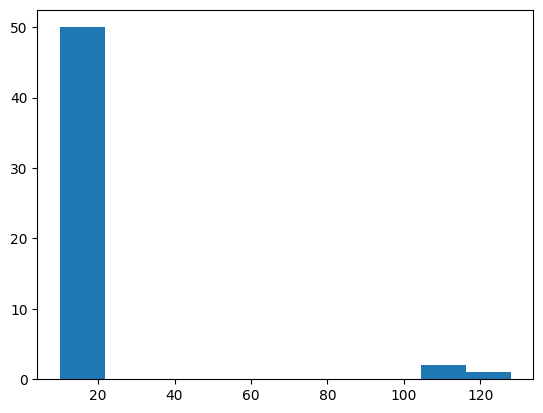

In [3]:
plt.hist(dataset)

- Removing outliers with respect to zscore and std deviation in distribution in accordance with the emperical formulae

In [4]:
outliers=[]

def detect_outliers(data):
  threshold=3                   # if datapoint beyond 3rd std deviation it is outlier
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    zscore=(i-mean)/std
    if np.abs(zscore)>threshold:                      # zscore means how many std devns away from mean   (zscore= (xi-mean)/std )
      outliers.append(i)

  return outliers

In [5]:
detect_outliers(dataset)

[128, 108, 111]

# In general outliers logic IQR

# IQR (25% - 75% range)
1. sort the data
2. Calculate Q1 and Q3
3. IQR(Q3-Q1)
4. Find the Lower fence (q1-1.5(iqr))
5. Find the Upper fence (q3+1.5(iqr))

In [6]:
dataset=sorted(dataset)

In [7]:
q1,q3=np.percentile(dataset,[25,75])

In [8]:
print(q1,q3)

11.0 14.0


In [9]:
# Find the lower fence and upper fence
outliers2=[]
iqr=q3-q1
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
for i in dataset:
  if i<lower_fence or i>upper_fence:
    outliers2.append(i)

In [10]:
outliers2

[108, 111, 128]

# General Visualisation method Boxplot

<Axes: >

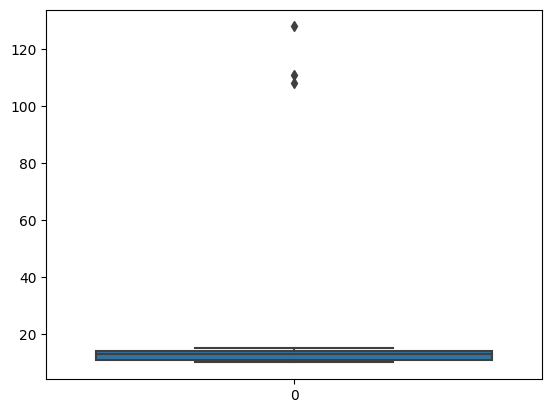

In [11]:
import seaborn as sns
sns.boxplot(dataset)

<Axes: >

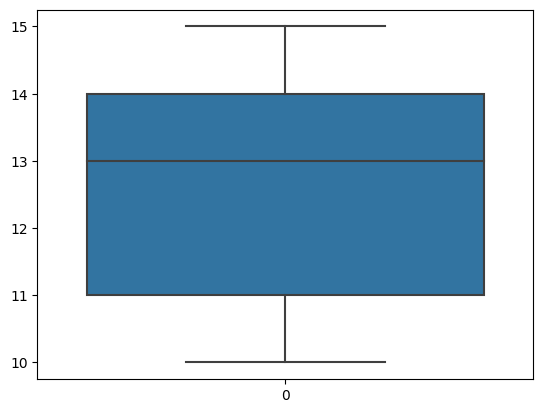

In [12]:
dataset.remove(128)
dataset.remove(111)
dataset.remove(108)

sns.boxplot(dataset)

- 25%=11, 75%=14,  median=13